<a href="https://colab.research.google.com/github/ev1025/1day1commit/blob/main/%EC%BD%94%EB%93%9C%EC%8A%A4%ED%85%8C%EC%9D%B4%EC%B8%A0/%EB%94%A5%EB%9F%AC%EB%8B%9D/Section4_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section4. Note2

## N421 자연어처리(Natural Language Processing, NLP)

### 자연어처리

- 말뭉치(Corpus) : 특정한 목적을 가지고 수집한 텍스트 데이터
- 문서(Document) : 문장(Sentence)들의 집합
- 문장(Sentence) : 여러 개의 토큰(단어, 형태소 등)으로 구성된 문자열. 마침표, 느낌표 등의 기호로 구분
- 어휘집합(Vocabulary) : 코퍼스에 있는 모든 문서, 문장을 토큰화한 후 중복을 제거한 토큰의 집합(set이라 보면됨)

### 전처리(Preprocessing)

- 토큰화(Tokenization) : 주어진 코퍼스에서 토큰이라 불리는 단위로 나누어주는 과정
- 불용어(Stop words) : 
- 어간 추출(Stemming) : 
- 표제어추출(Lemmatization) : 

#### 맨땅 토큰화

##### 1. 전처리(토큰화)


In [ ]:
# 정규표현식 전처리(Regex)
import re

regex = r"[^a-zA-Z0-9]" # 영어, 숫자가 아닌 문자
subst = ""              # 치환 할 문자

re.sub(regex, subst, 문장) # 문장에 있는 regex를 subst으로 치환

In [ ]:
# 정규표현식으로 토큰화 해주고, 소문자로 변경하여 띄어쓰기마다 나누기

def tokenize(text):
    regex = r"[^a-zA-Z0-9]"
    subst = ""
    
    tokens = re.sub(regex, subst, text)
    tokens = token.lower.split()

    return tokens

##### 2. apply로 토큰화

In [ ]:
# apply로 함수 적용
df.apply(함수, axis=0(열),1(행))
함수에 lambda x:x.lower()도 가능

In [ ]:
# apply로 reviews.text열을 토큰화하여 새로운 열 생성
df.['tokens'] = df['reviews.text'].apply(tokenize)

##### 3. 결과분석

In [ ]:
# 결과분석
from collections import Counter
# Counter객체는 리스트요소의 값과 개수를 카운트하여 튜플형태로 저장(단어, 개수)
word_counts= Counter()

# df['tokens']의 자료들을 Counter객체에 업데이트
df['tokens'].apply(lambda x: word_counts.update(x)) 

# 가장 많이 존재하는 단어 n개 내림차순으로 나열
word_counts.most_common(n)

# >>
# [('the', 10514),
#  ('and', 8137)]

##### 4. 시각화

In [ ]:
def word_count(docs):
    word_counts = Counter()    # 코퍼스에서 단어의 빈도 카운트
    word_in_docs = Counter()   # 단어가 포함된 문서의 빈도 카운트
    
    # 전체문서의 개수
    total_docs = len(docs)     
    
    # Counter객체에 값 넣어주기  
    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    # 단어별 빈도수  DataFrame 생성
    temp = zip(word_counts.keys(), word_counts.values()) 
    wc = pd.DataFrame(temp, columns = ['word', 'count'])           
    
    # 빈도수 내림차순 순위매김(first는 중복시, 먼저 나온게 우선)
    wc['rank'] = wc['count'].rank(method='first', ascending=False) 
    wc = wc.sort_values(by='rank')                              

    # 빈도수 백분률 컬럼
    total = wc['count'].sum()
    wc['percent'] = wc['count'].apply(lambda x: x/total)

    # 백분률 누적 비율컬럼
    wc['cul_persent'] = wc['percent'].cumsum()

    # 단어가 포함된 문서 빈도 수 DataFrame
    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])

    # word를 기준으로 두 Dataframe 합침
    wc = wc.merge(ac. on='word')

    # 전체 문서중에 문자가 존재하는 문서의 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x/total_docs)

    return wc

In [ ]:
# word_count함수에 토큰화 한 데이터(df['tokens'])를 넣어줌
wc = word_count(df['tokens'])

# 시각화
import seaborn as sns
sns.lineplot(data='wc', x='rank', y='cul_percent')

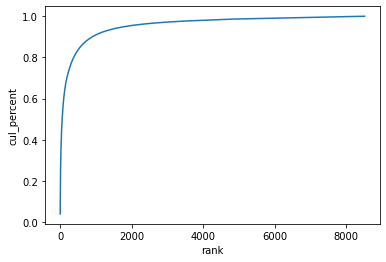

In [ ]:
wc[wc['rank'] <= 1000]['cul_percent'].max()
# >> 0.9097585076280484
# 랭크 1000위 안에 90%이상 데이터가 분포하고 있음

In [ ]:
!pip install squarify

In [ ]:
# Squarify를 이용하여 상위 20개의 백분율로 시각화
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6)
plt.axis('off')
plt.show()

#### SpaCy 토큰화(정규표현식or불용어처리)

불용어(Stop words)처리
- 일반적으로 분석에 의미가 없는 단어들을 제외하는 방법
- 대부분의 라이브러리가 일반적인 불용어를 내장하고 있음
- print(nlp.Defaults.stop_words)로 확인가능

In [ ]:
""" 
토큰화된 문서들을 입력받아 토큰을 카운트 하고 관련된 속성을 가진 데이터프레임을 리턴합니다.
    Args:
        docs (series or list): 토큰화된 문서가 들어있는 list
    Returns:
        list: Dataframe
"""
def word_count(docs):
    word_counts = Counter()    # 코퍼스에서 단어의 빈도 카운트
    word_in_docs = Counter()   # 단어가 포함된 문서의 빈도 카운트
    
    # 전체문서의 개수
    total_docs = len(docs)     
    
    # Counter객체에 값 넣어주기  
    for doc in docs:
        word_counts.update(doc)
        word_in_docs.update(set(doc))

    # 단어별 빈도수  DataFrame 생성
    temp = zip(word_counts.keys(), word_counts.values()) 
    wc = pd.DataFrame(temp, columns = ['word', 'count'])           
    
    # 빈도수 내림차순 순위매김(first는 중복시, 먼저 나온게 우선)
    wc['rank'] = wc['count'].rank(method='first', ascending=False) 
    wc = wc.sort_values(by='rank')                              

    # 빈도수 백분률 컬럼
    total = wc['count'].sum()
    wc['percent'] = wc['count'].apply(lambda x: x/total)

    # 백분률 누적 비율컬럼
    wc['cul_persent'] = wc['percent'].cumsum()

    # 단어가 포함된 문서 빈도 수 DataFrame
    temp2 = zip(word_in_docs.keys(), word_in_docs.values())
    ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])

    # word를 기준으로 두 Dataframe 합침
    wc = wc.merge(ac. on='word')

    # 전체 문서중에 문자가 존재하는 문서의 비율
    wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x/total_docs)

    return wc

In [1]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm") # 영어버전 열기
tokenizer = Tokenizer(nlp.vocab)   # 어휘집합(set)

In [ ]:
# Spacy 방법1 정규표현식
tokens =[]

# .pipe : 텍스트 스트림을 토큰화합니다.
for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
    tokens.append(doc_tokens)

# 토큰 컬럼 추가
df['tokens'] = tokens

In [ ]:
# Spacy 방법2 불용어처리
tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    doc_tokens = []

# 불용어 & 구두점 제거
# 단어마다 확인해서 doc_tokens에 추가하고
# 한 행의 리스트가 완료되면 tokens에 추가   
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [ ]:
# Spacy 방법3 불용어처리 커스터마이징
# 해당 단어들 불용어에 추가
STOP_WORDS = nlp.Defaults.stop_words.union(['it', "it's", 'it.', 'the', 'this'])

tokens = []

for doc in tokenizer.pipe(df['reviews.text']):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [ ]:
# 함수에 대입하여 분포를 구하기
wc = word_count(df['tokens'])
wc.head()

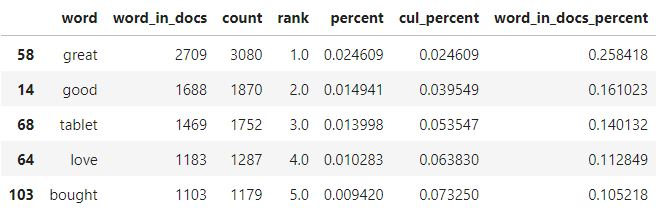

In [ ]:
!pip install squarify

In [ ]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

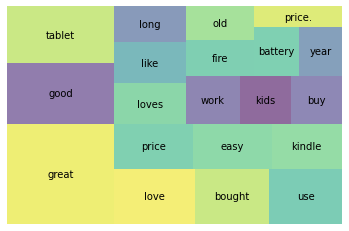

#### 통계적 트리밍(Trimming)

- 불용어를 제거하는 대신 통계적인 방법을 통해 너무 많거나, 적은 토큰을 제거하는 방법

In [ ]:
wc = wc[wc['word_in_docs_percent'] >= 0.01] # 1%이상의 문서에 나타나는 단어만 사용

#### 어간추출(Stemming)과 표제어 추출(Lemmatization)


##### 어간추출

- 단어의 뒷부분을 제거 (알고리즘 종류 : Porter, Snowball, Dawson 등)
- Spacy는 어간추출을 제공하지 않아서 nltk이용
- 알고리즘 : https://www.semanticscholar.org/paper/A-Comparative-Study-of-Stemming-Algorithms-Ms-.-Jivani/1c0c0fa35d4ff8a2f925eb955e48d655494bd167?p2df

In [3]:
# 어간추출 예시
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["wolf", "wolves"]

for word in words:
    print(ps.stem(word))

wolf
wolv


In [ ]:
# 전처리된 df['tokens']를 입력받아서 어간추출
from nltk.stem import PorterStemmer

ps = PorterStemmer()

tokens = []
for doc in df['tokens']:
    doc_tokens = []
    for token in doc:
        doc_tokens.append(ps.stem(token))
    tokens.append(doc_tokens)

df['stems'] = tokens

# 시각화
# wc = word_count(df['stems'])

# wc_top20 = wc[wc['rank'] <= 20]

# squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
# plt.axis('off')
# plt.show()

##### 표제어추출

- 기본 사전형 단어 형태 Lemma(표제어)로 변환
- 명사는 단수형, 동사는 동사원형으로 변환
- Spacy가 제공됨, 연산에 많은 시간이 필요함

In [7]:
# 표제어추출 예시
lem = "The social wolf. Wolves are complex."

nlp = spacy.load("en_core_web_sm") # 자연어처리호출

doc = nlp(lem)                     # 자연어처리(문장)

# wolf, wolve가 어떤 Lemma로 추출되는지 확인해 보세요
for token in doc:
    print(token.text, "  ", token.lemma_)

The    the
social    social
wolf    wolf
.    .
Wolves    wolf
are    be
complex    complex
.    .


In [ ]:
# 불용어, 구두점, 대명사가 아니면 표제어추출
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)

    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [ ]:
# 표제어 추출 시각화
df['lemmas'] = df['reviews.text'].apply(get_lemmas)

wc = word_count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['percent'], label=wc_top20['word'], alpha=0.6 )
plt.axis('off')
plt.show()

### 등장횟수기반의 단어 표현(Cout-based Representation)

- 벡터화(Vectorize) : 자연어를 컴퓨터가 이해할 수 있는 벡터로 만드는 작업
- 문서-단어행렬(Document-Term Matrix, DTM) : 행에는 문서이름, 열에는 단어(Term)이 있는 행렬

#### CountVectorizer

##### Bag-of-Words(BoW) : TF(Term Frequency)

In [8]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer

nlp = spacy.load("en_core_web_sm")

In [9]:
text = """In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.
The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word,
which helps to adjust for the fact that some words appear more frequently in general.
tf–idf is one of the most popular term-weighting schemes today.
A survey conducted in 2015 showed that 83% of text-based recommender systems in digital libraries use tf–idf."""

In [10]:
# 위 text를 표제어추출 토큰화
doc = nlp(text)
print([token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True)])

['information', 'retrieval', 'tf', 'idf', 'tfidf', 'short', 'term', 'frequency', 'inverse', 'document', 'frequency', 'numerical', 'statistic', 'intend', 'reflect', 'important', 'word', 'document', 'collection', 'corpus', '\n', 'weighting', 'factor', 'search', 'information', 'retrieval', 'text', 'mining', 'user', 'modeling', '\n', 'tf', 'idf', 'value', 'increase', 'proportionally', 'number', 'time', 'word', 'appear', 'document', 'offset', 'number', 'document', 'corpus', 'contain', 'word', '\n', 'help', 'adjust', 'fact', 'word', 'appear', 'frequently', 'general', '\n', 'tf', 'idf', 'popular', 'term', 'weight', 'scheme', 'today', '\n', 'survey', 'conduct', '2015', 'show', '83', 'text', 'base', 'recommender', 'system', 'digital', 'library', 'use', 'tf', 'idf']


In [11]:
# 문장으로 이루어진 리스트를 저장합니다.
sentences_lst = text.split('\n')

# CountVectorizer를 변수에 저장합니다.
vect = CountVectorizer()

# 어휘 사전을 생성합니다.
vect.fit(sentences_lst)

# text를 DTM(document-term matrix)으로 변환(transform), tf값 계산
dtm_count = vect.transform(sentences_lst)

In [12]:
# 모든 토큰의 인덱싱정보
vect.vocabulary_

{'in': 26,
 'information': 28,
 'retrieval': 49,
 'tf': 60,
 'idf': 24,
 'or': 44,
 'tfidf': 61,
 'short': 52,
 'for': 18,
 'term': 58,
 'frequency': 19,
 'inverse': 30,
 'document': 14,
 'is': 31,
 'numerical': 39,
 'statistic': 55,
 'that': 62,
 'intended': 29,
 'to': 65,
 'reflect': 48,
 'how': 23,
 'important': 25,
 'word': 73,
 'collection': 9,
 'corpus': 12,
 'it': 32,
 'often': 42,
 'used': 68,
 'as': 6,
 'weighting': 71,
 'factor': 17,
 'searches': 51,
 'of': 40,
 'text': 59,
 'mining': 34,
 'and': 3,
 'user': 69,
 'modeling': 35,
 'the': 63,
 'value': 70,
 'increases': 27,
 'proportionally': 46,
 'number': 38,
 'times': 64,
 'appears': 5,
 'offset': 41,
 'by': 8,
 'documents': 15,
 'contain': 11,
 'which': 72,
 'helps': 22,
 'adjust': 2,
 'fact': 16,
 'some': 54,
 'words': 74,
 'appear': 4,
 'more': 36,
 'frequently': 20,
 'general': 21,
 'one': 43,
 'most': 37,
 'popular': 45,
 'schemes': 50,
 'today': 66,
 'survey': 56,
 'conducted': 10,
 '2015': 0,
 'showed': 53,
 '83': 1,


In [13]:
# DTM의 배열확인(6개의 문서와 75개의 단어)
dtm_count.shape

(6, 75)

In [ ]:
# 특성 이름만 추출
vect.get_feature_names()

In [17]:
# (row, column) count형태
print(dtm_count)

  (0, 9)	1
  (0, 12)	1
  (0, 14)	2
  (0, 18)	1
  (0, 19)	2
  (0, 23)	1
  (0, 24)	1
  (0, 25)	1
  (0, 26)	2
  (0, 28)	1
  (0, 29)	1
  (0, 30)	1
  (0, 31)	3
  (0, 39)	1
  (0, 44)	2
  (0, 48)	1
  (0, 49)	1
  (0, 52)	1
  (0, 55)	1
  (0, 58)	1
  (0, 60)	1
  (0, 61)	1
  (0, 62)	1
  (0, 65)	2
  (0, 73)	1
  :	:
  (4, 43)	1
  (4, 45)	1
  (4, 50)	1
  (4, 58)	1
  (4, 60)	1
  (4, 63)	1
  (4, 66)	1
  (4, 71)	1
  (5, 0)	1
  (5, 1)	1
  (5, 7)	1
  (5, 10)	1
  (5, 13)	1
  (5, 24)	1
  (5, 26)	2
  (5, 33)	1
  (5, 40)	1
  (5, 47)	1
  (5, 53)	1
  (5, 56)	1
  (5, 57)	1
  (5, 59)	1
  (5, 60)	1
  (5, 62)	1
  (5, 67)	1


In [18]:
# 빈도수만 매트릭스형태로 변경(numpy.matrix)
dtm_count.todense()

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 2, 0,
         0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
         0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1,
         0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
         6, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
         1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1

In [21]:
# 매트릭스 Dataframe형식으로 변경
dtm_count = pd.DataFrame(dtm_count.todense(), columns=vect.get_feature_names())
dtm_count

,2015,83,adjust,and,appear,appears,as,based,by,collection,...,to,today,use,used,user,value,weighting,which,word,words
0,0,0,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
2,0,0,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,0,0,2,0
3,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
5,1,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
# 위에 전처리 데이터 적용예시
count_vect = CountVectorizer(stop_words='english', max_features=100) # tf 100개만

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_count_amazon = count_vect.fit_transform(df['reviews.text'])

dtm_count_amazon = pd.DataFrame(dtm_count_amazon.todense(), columns=count_vect.get_feature_names())
dtm_count_amazon

##### Bag-of-Words : TF-IDF(Term Frequency - Inverse Document Frequency)

- 특정 문서에만 등장하는 단어에 가중치를 두는 방법
- TF(w) = 특정 문서 내 단어 w의 수
- IDF(w) = log(전체문서의 수 / w가 있는 문서의 수 +1)
- TF-IDF(w) = TF(w) * IDF(w)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer. 테이블을 작게 만들기 위해 max_features=15로 제한하였습니다.
tfidf = TfidfVectorizer(stop_words='english', max_features=15)

# Fit 후 dtm을 만듭니다.(문서, 단어마다 tf-idf 값을 계산합니다)
dtm_tfidf = tfidf.fit_transform(sentences_lst)

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

###### 파라미터 튜닝해서 사용하는법 TF-IDF

In [22]:
# SpaCy 를 이용한 Tokenizing

def tokenize(document):
    doc = nlp(document)
    return [token.lemma_.strip() for token in doc if (token.is_stop != True) and (token.is_punct != True) and (token.is_alpha == True)]

In [ ]:
"""
    args:
        ngram_range = (min_n, max_n), min_n 개~ max_n 개를 갖는 n-gram(n개의 연속적인 토큰)을 토큰으로 사용합니다.
        min_df = n : int, 최소 n개의 문서에 나타나는 토큰만 사용합니다.
        max_df = m : float(0~1), m * 100% 이상 문서에 나타나는 토큰은 제거합니다.
    """

tfidf_tuned = TfidfVectorizer(stop_words='english'
                        ,tokenizer=tokenize
                        ,ngram_range=(1,2) # (min, max) min~ max개의 단어 묶음으로 토큰화(보통 1~5개가 적당)
                        ,max_df=.7         # float, 퍼센트 이상의 문서에서 나타나는 단어는 제거
                        ,min_df=3          # int, 최소 n개의 문서에서 나타나는 단어만 사용
                       )

dtm_tfidf_tuned = tfidf_tuned.fit_transform(df['reviews.text'])
dtm_tfidf_tuned = pd.DataFrame(dtm_tfidf_tuned.todense(), columns=tfidf_tuned.get_feature_names())
dtm_tfidf_tuned.head()

###### 유사도를 이용한 문서검색(NearestNeighbor (K-NN, K-최근접 이웃))

In [ ]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용해 NN 모델에 학습, 본인포함 5개의 이웃을 찾도록 설정(DEFAULT)
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf_amazon)

In [ ]:
# 아마존데이터 2행데이터와 가까운 5개 찾기
# [유클리디안거리], [인덱스] 형태로 나옴
nn.kneighbors([dtm_tfidf_amazon.iloc[2]])

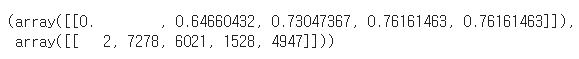

In [ ]:
# 문서검색 예제
# 예제와 가장 비슷한 값을 기존 정보에서 찾아오는 것
# 출처 : https://www.amazon.com/Samples/product-reviews/B000001HZ8?reviewerType=all_reviews
sample_review = ["""in 1989, I managed a crummy bicycle shop, "Full Cycle" in Boulder, Colorado.
The Samples had just recorded this album and they played most nights, at "Tulagi's" - a bar on 13th street.
They told me they had been so broke and hungry, that they lived on the free samples at the local supermarkets - thus, the name.
i used to fix their bikes for free, and even feed them, but they won't remember.
That Sean Kelly is a gifted songwriter and singer."""]

In [ ]:
new = tfidf_vect.transform(sample_review)

In [ ]:
nn.kneighbors(new.todense())

In [ ]:
# 가장 가깝게 나온 문서를 확인합니다 
df['reviews.text'][10035]